In [1]:
! pip3 install numpy
! pip3 install matplotlib
! pip3 install math
! pip3 install heapq_max
! pip3 install scikit-learn
! pip3 install time
! pip3 install csv
! pip3 install pandas
! pip3 install more_itertools


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\harsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\harsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\harsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\harsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\harsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\harsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\harsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\harsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\harsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import heapq
import random
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import time
import csv
import pandas as pd
from more_itertools import powerset
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from collections import defaultdict
%matplotlib inline 

In [18]:
data = np.load('data.npy', allow_pickle=True)

(1500, 1024)


In [4]:
data_gameid = {}
for i in range(0, data.shape[0]):
    if data[i][0] in data_gameid:
        print("Invalid Data!")
    else:
        data_gameid[data[i][0]] = 1

In [5]:
labels = data[:, 3]
label_to_index = {}
index_to_label = {}
count = 0
for label in labels:
    if label not in label_to_index:
        label_to_index[label] = count
        index_to_label[count] = label
        count += 1
for i in range(0, data.shape[0]):
    data[i][3] = label_to_index[data[i][3]]

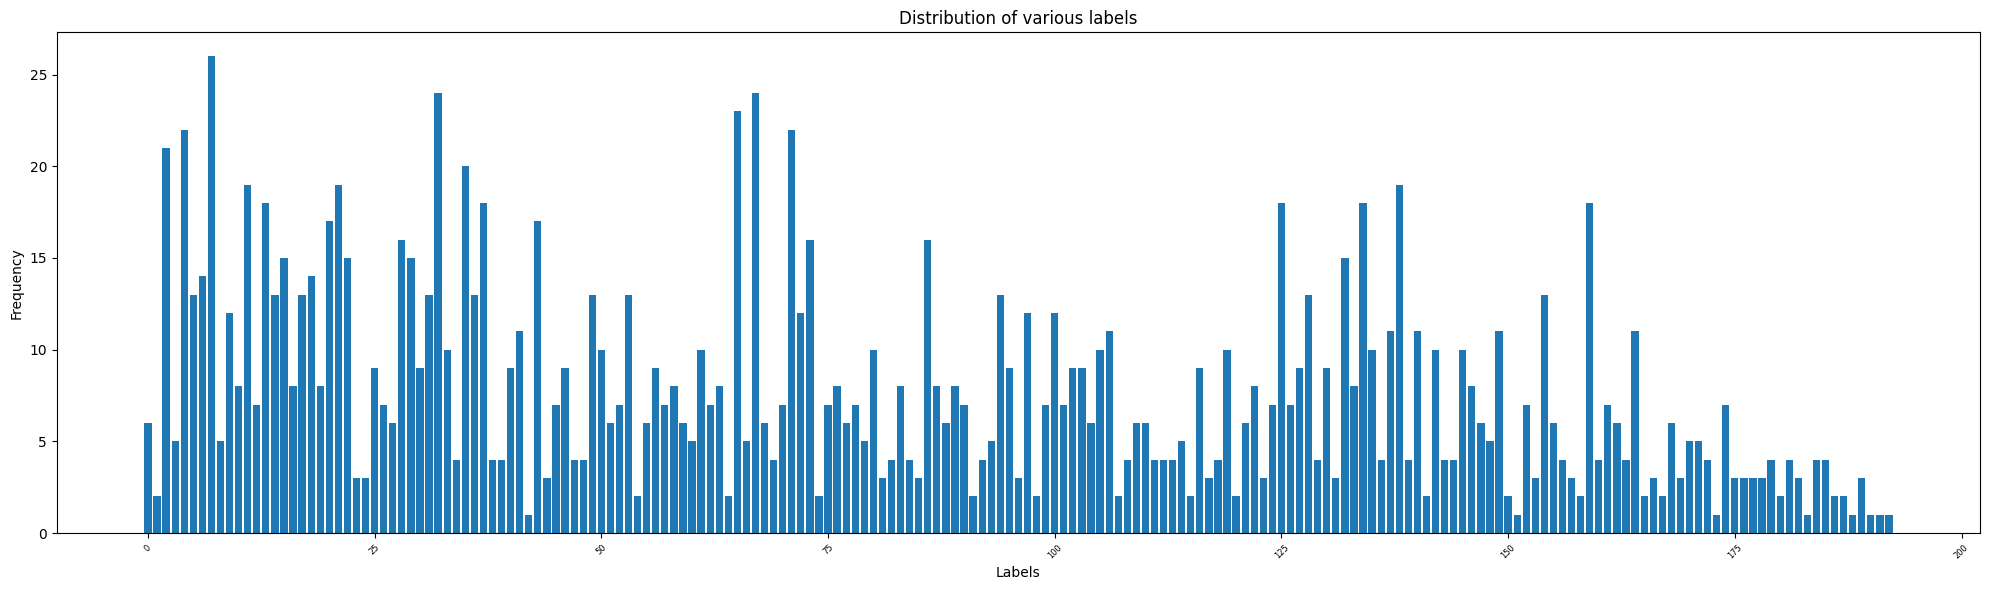

In [6]:
# chatGPT Generated starts
dict_for_labels = {}
for i in range(0,data.shape[0]):
    value = dict_for_labels.get(data[i][3])
    if value is not None:
        dict_for_labels[data[i][3]] += 1
    else:
        dict_for_labels[data[i][3]] = 1

fig = plt.figure(figsize=(20, 6))
keys = dict_for_labels.keys()
values = dict_for_labels.values()
plt.bar(keys, values)
plt.xticks(rotation=45, fontsize=6)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of various labels')
plt.tight_layout()
plt.show()
# chatGPT Generated ends

In [7]:
class KNN:
    def __init__(self, k = 3, encoder = "resnets", distance_metric = "l2", weighing_scheme = "equal_for_all", feature_scalling = "", splitting_ratio = 0.2):
        self.k = k
        self.encoder = encoder
        self.distance_metric = distance_metric
        self.weighing_sceme = weighing_scheme
        self.feature_scalling = feature_scalling
        self.splitting_ratio = splitting_ratio

    def train(self, data):
        self.data = data

    def predict(self, data_point):
        heap = []
        heapq.heapify(heap)
        for i in range(0, self.data.shape[0]):
            if self.distance_metric == "cosine":
                if self.encoder == "resnets":
                    sq1 = np.square(self.data[i][1][0])
                if self.encoder == "vit":
                    sq1 = np.square(self.data[i][2][0])
                sum1 = np.sum(sq1)
                sum1 = math.sqrt(sum1)
                sq2 = np.square(data_point)
                sum2 = np.sum(sq2)
                sum2 = math.sqrt(sum2)
                if self.encoder == "resnets":
                    mul = self.data[i][1][0] * data_point
                if self.encoder == "vit":
                    mul = self.data[i][2][0] * data_point
                sum = np.sum(mul)
                distance = 1 - sum / (sum1*sum2)
                heapq.heappush(heap, (distance, self.data[i][3]))
            if self.distance_metric == "l1":
                if self.encoder == "resnets":
                    distance = np.sum(np.abs(self.data[i][1][0] - data_point))
                if self.encoder == "vit":
                    distance = np.sum(np.abs(self.data[i][2][0] - data_point))
                heapq.heappush(heap, (distance, self.data[i][3]))
            if self.distance_metric == "l2":
                if self.encoder == "resnets":
                    distance = np.linalg.norm(self.data[i][1][0] - data_point)
                if self.encoder == "vit":
                    distance = np.linalg.norm(self.data[i][2][0] - data_point)
                heapq.heappush(heap, (distance, self.data[i][3]))
        dict = {}
        for i in range(0,self.k):
            top = heapq.heappop(heap)
            value = dict.get(top[1])
            if value is not None:
                dict[top[1]] += 1
            else:
                dict[top[1]] = 1
        max = 0
        label = ""
        for key in dict:
            value = dict[key]
            if value > max:
                max = value
                label = key
        return label

    def model_metrics(self, data):
        self.data = data
        split_index = int(self.data.shape[0] * self.splitting_ratio)
        validation_set = self.data[:split_index]
        train_set = self.data[split_index:]
        train_set_gameid = {}
        for i in range(0, train_set.shape[0]):
            train_set_gameid[train_set[i][0]] = 1
        for i in range(0, validation_set.shape[0]):
            if validation_set[i][0] in train_set_gameid:
                return "error"
        self.train(train_set)
        predicted = []
        true = []
        for i in range(0,validation_set.shape[0]):
            if self.encoder == "resnets":
                predicted.append(self.predict(validation_set[i][1][0]))
            if self.encoder == "vit":
                predicted.append(self.predict(validation_set[i][2][0]))
            true.append(validation_set[i][3])
        accuracy = metrics.accuracy_score(true, predicted)
        average_recall = metrics.recall_score(true, predicted, average='macro', zero_division=1)
        recall_per_class = metrics.recall_score(true, predicted, average=None, zero_division=1)
        average_f1 = metrics.f1_score(true, predicted, average='macro', zero_division=1)
        f1_per_class = metrics.f1_score(true, predicted, average=None, zero_division=1)
        average_precision = metrics.precision_score(true, predicted, average='macro', zero_division=1)
        precision_per_class = metrics.precision_score(true, predicted, average=None, zero_division=1)
        print("accuracy:", accuracy)
        print("average_recall:", average_recall)
        print("recall_per_class:", recall_per_class)
        print("average_f1:", average_f1)
        print("f1_per_class:", f1_per_class)
        print("average_precision:", average_precision)
        print("precision_per_class:", precision_per_class)
        print("true:", true)
        print("predicted:", predicted)
        return accuracy

In [8]:
# data_point_number = 0
model = KNN(splitting_ratio=0.2, encoder="vit", distance_metric="cosine", k=5)
model.model_metrics(data)
# model.train(data)
# label = model.predict(data[data_point_number][1][0])
# label, data[data_point_number][3]

accuracy: 0.22333333333333333
average_recall: 0.2621676891615542
recall_per_class: [0.         0.         0.66666667 0.         0.4        0.
 0.66666667 0.5        0.         0.33333333 0.         0.
 0.         1.         1.         0.2        0.33333333 0.
 0.5        0.         1.         0.         0.         0.
 0.         1.         0.         0.         0.5        0.
 0.         0.5        0.5        0.5        0.         0.
 0.25       1.         0.         0.         0.33333333 0.
 0.         0.5        0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.5        0.         0.         1.
 0.         0.33333333 0.         0.5        0.         0.
 0.         1.         0.         0.         0.         1.
 0.5        0.         0.         0.         0.         0.
 0.         0.         0.25       0.         0.         0.
 0.         0.         0.8        0.         0.         0.
 0.         0.         0.       

0.22333333333333333

In [9]:
table = []
odd_array = np.arange(1, 22, 2)
for k in odd_array:
    for encoder in ["resnets", "vit"]:
        for distance_metric in ["cosine", "l1", "l2"]:
            model = KNN(k=k, encoder=encoder, distance_metric=distance_metric)
            table.append([k, encoder, distance_metric, model.model_metrics(data)])
print(table)

accuracy: 0.14333333333333334
average_recall: 0.23908848968729207
recall_per_class: [0.         0.         0.11111111 0.         0.2        0.
 0.33333333 0.5        0.         0.33333333 0.         0.
 0.         0.66666667 1.         0.         0.33333333 0.
 0.5        0.         0.66666667 0.25       0.         0.
 0.         0.         0.         0.         0.75       0.
 0.         0.         0.5        0.         0.         0.
 0.         0.         0.         0.         0.33333333 0.
 0.         0.5        0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.25
 0.         0.         0.         0.         0.5        0.5
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         1.         0.2        0.         0.         1.
 1.         0.         0.   

In [10]:
for i in table:
    print(i)
np_table = np.array(table)

[1, 'resnets', 'cosine', 0.14333333333333334]
[1, 'resnets', 'l1', 0.13333333333333333]
[1, 'resnets', 'l2', 0.13333333333333333]
[1, 'vit', 'cosine', 0.21666666666666667]
[1, 'vit', 'l1', 0.21666666666666667]
[1, 'vit', 'l2', 0.21666666666666667]
[3, 'resnets', 'cosine', 0.13333333333333333]
[3, 'resnets', 'l1', 0.13666666666666666]
[3, 'resnets', 'l2', 0.13666666666666666]
[3, 'vit', 'cosine', 0.2]
[3, 'vit', 'l1', 0.19666666666666666]
[3, 'vit', 'l2', 0.21666666666666667]
[5, 'resnets', 'cosine', 0.14333333333333334]
[5, 'resnets', 'l1', 0.16666666666666666]
[5, 'resnets', 'l2', 0.13666666666666666]
[5, 'vit', 'cosine', 0.22333333333333333]
[5, 'vit', 'l1', 0.23333333333333334]
[5, 'vit', 'l2', 0.21666666666666667]
[7, 'resnets', 'cosine', 0.14333333333333334]
[7, 'resnets', 'l1', 0.17333333333333334]
[7, 'resnets', 'l2', 0.14]
[7, 'vit', 'cosine', 0.23]
[7, 'vit', 'l1', 0.24666666666666667]
[7, 'vit', 'l2', 0.23333333333333334]
[9, 'resnets', 'cosine', 0.15666666666666668]
[9, 'res

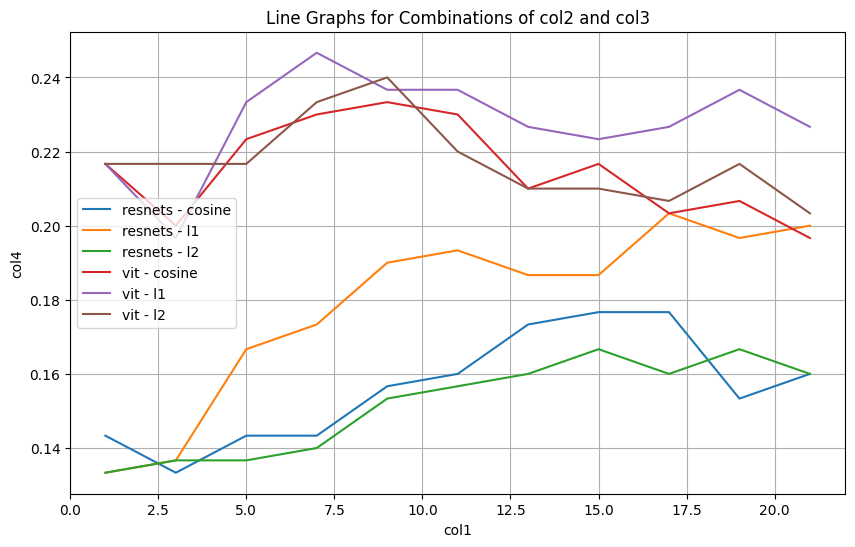

In [11]:
# chatGPT Generated starts
plot_data = defaultdict(list)
for row in table:
    x = row[0]
    y = row[3]
    label = f"{row[1]} - {row[2]}"
    plot_data[label].append((x, y))
plt.figure(figsize=(10, 6))
for label, points in plot_data.items():
    x_values, y_values = zip(*points)
    plt.plot(x_values, y_values, label=label)
plt.xlabel('col1')
plt.ylabel('col4')
plt.title('Line Graphs for Combinations of col2 and col3')
plt.legend()
plt.grid(True)
plt.show()
# chatGPT Generated ends

In [12]:
table_for_resnets = np_table[np_table[:, 1]=="vit"]
table_for_resnets_manhattan = table_for_resnets[table_for_resnets[:, 2]=="l1"]
table_for_resents_and_manhattan = table_for_resnets_manhattan[:, [0, 3]]
table_for_resents_and_manhattan = np.array([np.squeeze(element) for element in table_for_resents_and_manhattan])
print(table_for_resents_and_manhattan)

[['1' '0.21666666666666667']
 ['3' '0.19666666666666666']
 ['5' '0.23333333333333334']
 ['7' '0.24666666666666667']
 ['9' '0.23666666666666666']
 ['11' '0.23666666666666666']
 ['13' '0.22666666666666666']
 ['15' '0.22333333333333333']
 ['17' '0.22666666666666666']
 ['19' '0.23666666666666666']
 ['21' '0.22666666666666666']]


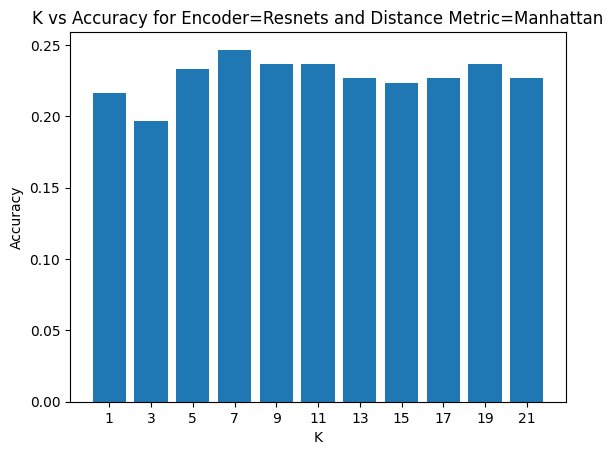

In [13]:
k_values = table_for_resents_and_manhattan[:, 0]
accuracy_values = table_for_resents_and_manhattan[:, 1]
accuracy_values = np.array(accuracy_values).astype(float)

# chatGPT Generated starts
plt.bar(k_values, accuracy_values)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy for Encoder=Resnets and Distance Metric=Manhattan')
plt.show()
# chatGPT Generated ends

In [14]:
initial_optimized_knn = KNN()
best_knn = KNN(k=7, encoder="vit", distance_metric="l1")
data_sklearn = np.load('data.npy', allow_pickle=True)
sklearn_knn = KNeighborsClassifier(n_neighbors=3)
split_index = int(data_sklearn.shape[0] * 0.2)
validation_set_x = data_sklearn[:split_index, 2]
validation_set_x = np.array([np.squeeze(element) for element in validation_set_x])
train_set_x = data_sklearn[split_index:, 2]
train_set_x = np.array([np.squeeze(element) for element in train_set_x])
validation_set_y = data_sklearn[:split_index, 3]
train_set_y = data_sklearn[split_index:, 3]
sklearn_knn.fit(train_set_x, train_set_y)

KNeighborsClassifier(n_neighbors=3)

In [15]:
inference_times = {}
inference_time_start = time.time()
y_pred = sklearn_knn.predict(validation_set_x)
inference_time_end = time.time()
inference_time = inference_time_end - inference_time_start
inference_times["sklearn"] = inference_time
inference_time_start = time.time()
y_pred = initial_optimized_knn.model_metrics(data)
inference_time_end = time.time()
inference_time = inference_time_end - inference_time_start
inference_times["initial_optimized"] = inference_time
inference_time_start = time.time()
y_pred = best_knn.model_metrics(data)
inference_time_end = time.time()
inference_time = inference_time_end - inference_time_start
inference_times["best"] = inference_time

accuracy: 0.13666666666666666
average_recall: 0.22245649263721554
recall_per_class: [0.         0.         0.11111111 0.         0.2        0.
 0.33333333 0.5        0.         0.33333333 0.         0.
 0.         1.         0.         0.         0.33333333 0.
 0.5        0.         0.66666667 0.25       0.         0.
 0.         0.         0.         0.         0.75       0.
 0.         0.         0.33333333 0.         0.         0.
 0.         0.         0.         0.         0.33333333 0.
 0.         0.5        0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.25
 0.         0.         0.         0.         0.5        0.
 0.         0.         0.         0.         0.         0.
 0.         0.33333333 0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         1.         0.2        0.         0.         1.
 1.         0.         0.    

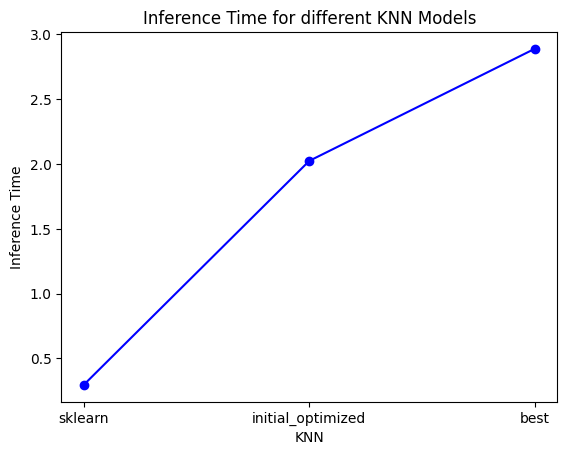

In [16]:
# chatGPT Generated starts
years = list(inference_times.keys())
values = list(inference_times.values())
plt.plot(years, values, marker='o', linestyle='-', color='b')
plt.xlabel('KNN')
plt.ylabel('Inference Time')
plt.title('Inference Time for different KNN Models')
plt.show()
# chatGPT Generated ends

In [17]:
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
sklearn_inference_time = []
initial_optimized_inference_time = []
best_inference_time = []
for data_split_ratio in split_ratios:
    initial_optimized_knn = KNN(splitting_ratio=data_split_ratio)
    best_knn = KNN(k=7, encoder="vit", distance_metric="l1", splitting_ratio=data_split_ratio)
    sklearn_knn = KNeighborsClassifier(n_neighbors=3)
    split_index = int(data_sklearn.shape[0] * 0.2)
    validation_set_x = data_sklearn[:split_index, 2]
    validation_set_x = np.array([np.squeeze(element) for element in validation_set_x])
    train_set_x = data_sklearn[split_index:, 2]
    train_set_x = np.array([np.squeeze(element) for element in train_set_x])
    validation_set_y = data_sklearn[:split_index, 3]
    train_set_y = data_sklearn[split_index:, 3]
    sklearn_knn.fit(train_set_x, train_set_y)
    inference_time_start = time.time()
    y_pred = sklearn_knn.predict(validation_set_x)
    inference_time_end = time.time()
    inference_time = inference_time_end - inference_time_start
    sklearn_inference_time.append(inference_time)
    inference_time_start = time.time()
    y_pred = initial_optimized_knn.model_metrics(data)
    inference_time_end = time.time()
    inference_time = inference_time_end - inference_time_start
    initial_optimized_inference_time.append(inference_time)
    inference_time_start = time.time()
    y_pred = best_knn.model_metrics(data)
    inference_time_end = time.time()
    inference_time = inference_time_end - inference_time_start
    best_inference_time.append(inference_time)

accuracy: 0.17333333333333334
average_recall: 0.3641221374045801
recall_per_class: [0.         0.         0.2        0.         0.5        0.
 0.5        0.5        0.         0.5        0.         0.33333333
 0.         1.         0.         0.33333333 0.         0.
 0.5        0.         0.66666667 0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.33333333 0.         0.         1.
 0.         0.         0.         0.         0.5        0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.5
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.33333333 0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         1.
 0.         0.         

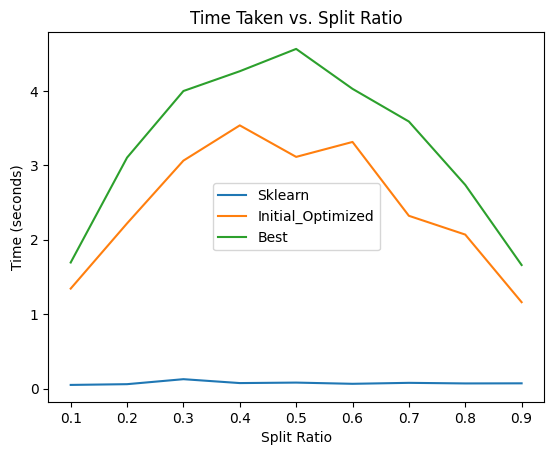

In [18]:
# chatGPT Generated starts
plt.plot(split_ratios, sklearn_inference_time, label='Sklearn')
plt.plot(split_ratios, initial_optimized_inference_time, label='Initial_Optimized')
plt.plot(split_ratios, best_inference_time, label='Best')
plt.xlabel('Split Ratio')
plt.ylabel('Time (seconds)')
plt.title('Time Taken vs. Split Ratio')
plt.legend()
plt.show()
# chatGPT Generated ends

In [19]:
data = pd.read_csv('./advertisement.csv')
print(data)

     age  gender        income    education  married  children           city   
0     45    Male  61271.953359       Master    False         3    Lake Sheila  \
1     24  Female  53229.101074  High School    False         1   Crystalburgh   
2     45  Female  30066.046684     Bachelor     True         3  Margaretburgh   
3     19    Male  48950.246384          PhD    False         0  Williamshaven   
4     29  Female  44792.627094       Master    False         0       New Paul   
..   ...     ...           ...          ...      ...       ...            ...   
995   61    Male  34246.773063       Master     True         3      Solisfurt   
996   56  Female  45494.225591     Bachelor    False         0    Dawsonmouth   
997   64  Female  68740.442006          PhD     True         0  Lake Garyport   
998   18  Female  44348.446680     Bachelor     True         0       Ericfurt   
999   61    Male  39160.083677       Master    False         0      Port Jose   

      occupation  purchase_

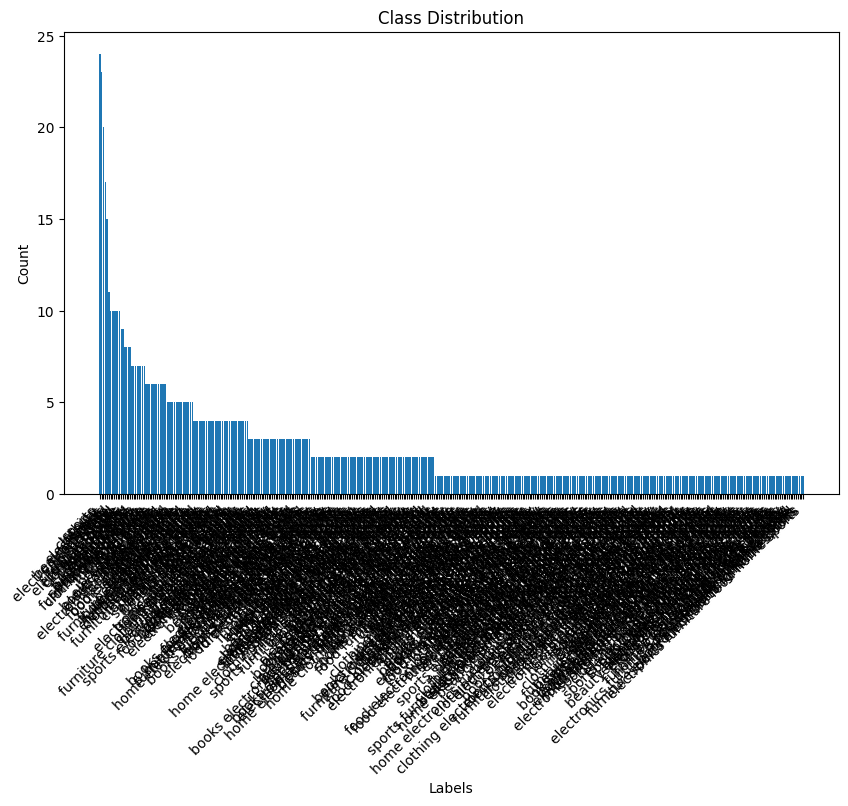

In [20]:
# chatGPT Generated starts
class_counts = data['labels'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()
# chatGPT Generated ends

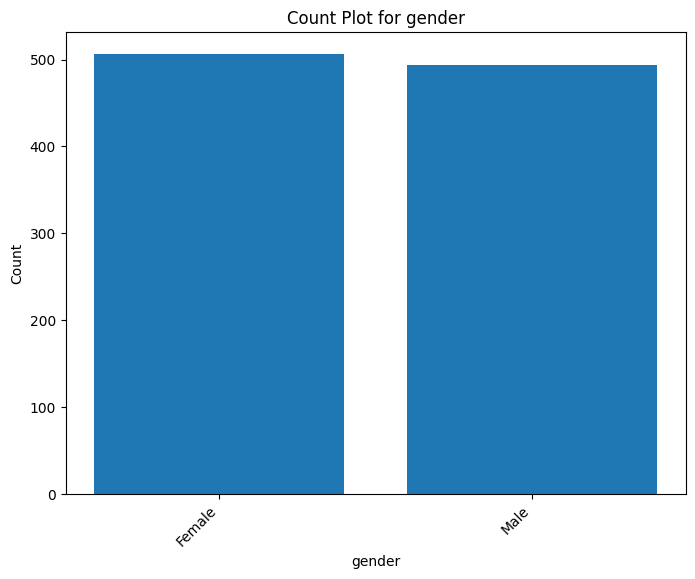

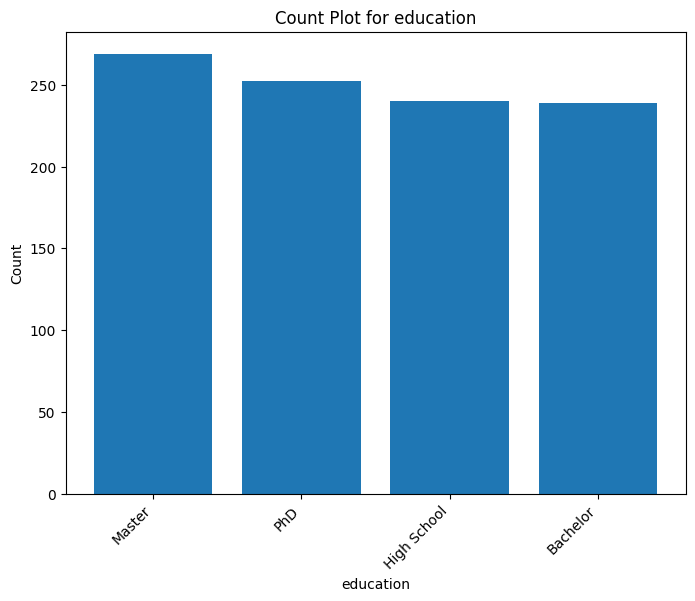

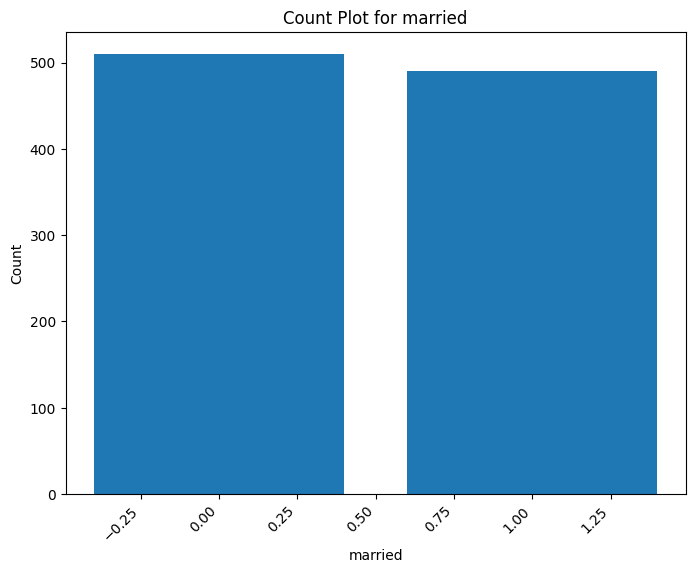

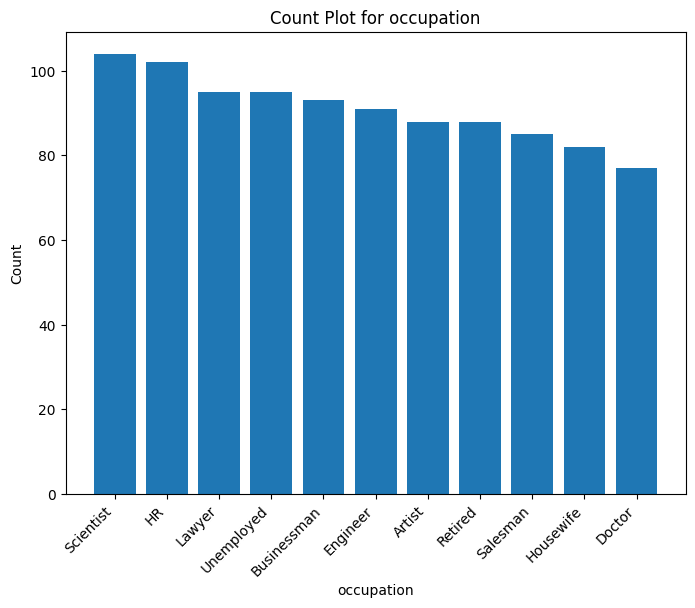

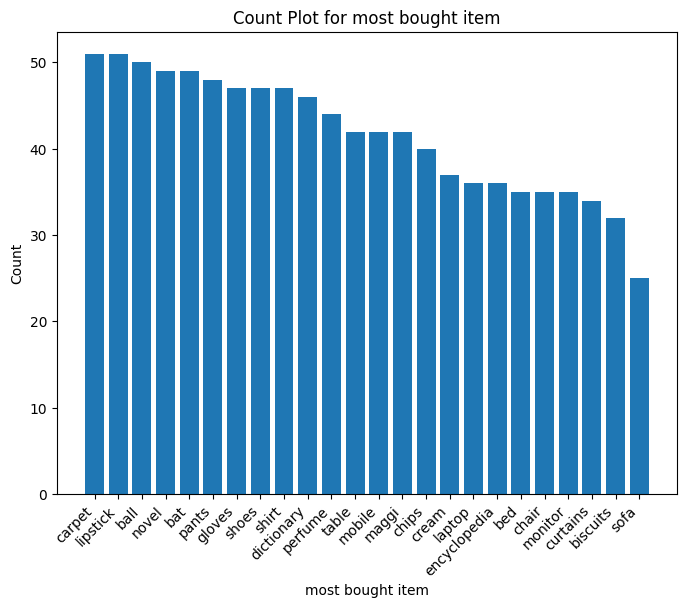

In [21]:
# chatGPT Generated starts
categorical_vars = ["gender", "education", "married", "occupation", "most bought item"]
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    counts = data[var].value_counts()
    plt.bar(counts.index, counts.values)
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.title(f"Count Plot for {var}")
    plt.show()
# chatGPT Generated ends

In [22]:
# chatGPT Generated starts
list_of_labels = [text.split() for text in data['labels']]
flat_list = [item for sublist in list_of_labels for item in sublist]
unique_elements = set(flat_list)
# chatGPT Generated ends
print(unique_elements)
power_set = list(powerset(unique_elements))
power_set.pop(0)
power_set = [tuple(sorted(t)) for t in power_set]
print((power_set))
# chatGPT Generated starts
binary_representation = []
for tup in power_set:
    binary = [0] * len(unique_elements)
    for i, element in enumerate(unique_elements):
        if element in tup:
            binary[i] = 1
    binary_representation.append(binary)
print(binary_representation)
# chatGPT Generated ends

{'sports', 'electronics', 'clothing', 'home', 'books', 'food', 'beauty', 'furniture'}
[('sports',), ('electronics',), ('clothing',), ('home',), ('books',), ('food',), ('beauty',), ('furniture',), ('electronics', 'sports'), ('clothing', 'sports'), ('home', 'sports'), ('books', 'sports'), ('food', 'sports'), ('beauty', 'sports'), ('furniture', 'sports'), ('clothing', 'electronics'), ('electronics', 'home'), ('books', 'electronics'), ('electronics', 'food'), ('beauty', 'electronics'), ('electronics', 'furniture'), ('clothing', 'home'), ('books', 'clothing'), ('clothing', 'food'), ('beauty', 'clothing'), ('clothing', 'furniture'), ('books', 'home'), ('food', 'home'), ('beauty', 'home'), ('furniture', 'home'), ('books', 'food'), ('beauty', 'books'), ('books', 'furniture'), ('beauty', 'food'), ('food', 'furniture'), ('beauty', 'furniture'), ('clothing', 'electronics', 'sports'), ('electronics', 'home', 'sports'), ('books', 'electronics', 'sports'), ('electronics', 'food', 'sports'), ('beauty

In [23]:
data['labels'] = data['labels'].str.split()
data['labels'] = data['labels'].apply(lambda x: tuple(x))
data['labels'] = data['labels'].apply(lambda x: tuple(sorted(x)))
print(data['labels'])

0            (clothing, electronics, sports)
1                        (beauty, furniture)
2      (clothing, electronics, food, sports)
3                                    (food,)
4                                    (home,)
                       ...                  
995                        (food, furniture)
996                   (clothing, food, home)
997                       (clothing, sports)
998                                (beauty,)
999                        (books, clothing)
Name: labels, Length: 1000, dtype: object


In [24]:
y = data['labels']
# chatGPT Generated starts
tuple_to_index = {tuple: index for index, tuple in enumerate(power_set)}
# chatGPT Generated ends
y = [tuple_to_index[tuple] for tuple in y]
columns_to_keep = data.columns.difference(['labels'])
columns_to_encode = ['gender', 'education', 'married' , 'city', 'occupation', 'most bought item']
for col in columns_to_encode:
    data[col] = LabelEncoder().fit_transform(data[col])
x = data[columns_to_keep]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
class DT_Powerset:
    def __init__(self, max_depth=3, max_features=20, criterion="entropy"):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, criterion=criterion)

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.model.fit(x_train, y_train)

    def predict(self, x_test):
        return self.model.predict(x_test)

    def print_kfold_metrics(self, x_train, y_train, k, binary_representation):
        n = len(x_train)
        base_partition_size = n // k
        remainder = n % k
        partitions_x = []
        partitions_y = []
        start_idx = 0
        for i in range(k):
            if i < remainder:
                partition_size = base_partition_size + 1
            else:
                partition_size = base_partition_size
            end_idx = start_idx + partition_size
            partition_x = x_train[start_idx:end_idx]
            partition_y = y_train[start_idx:end_idx]
            partitions_x.append(partition_x)
            partitions_y.append(partition_y)
            start_idx = end_idx
        kfold_metrics = []
        for i in range(0, len(partitions_x)):
            if i != 0:
                x_train_new = partitions_x[0]
                y_train_new = partitions_y[0]
                for j in range(1, len(partitions_x)):
                    if i != j:
                        x_train_new = x_train_new._append(partitions_x[j], ignore_index=True)
                        y_train_new = y_train_new + partitions_y[j]
            else:
                x_train_new = partitions_x[1]
                y_train_new = partitions_y[1]
                for j in range(2, len(partitions_x)):
                    x_train_new = x_train_new._append(partitions_x[j], ignore_index=True)
                    y_train_new = y_train_new + partitions_y[j]
            self.fit(x_train_new, y_train_new)
            y_pred = self.predict(partitions_x[i])
            y_test = partitions_y[i]
            y_test_binary = []
            for i in y_test:
                y_test_binary.append(binary_representation[i])
            y_pred_binary = []
            for i in y_pred:
                y_pred_binary.append(binary_representation[i])
            loss = metrics.hamming_loss(y_test_binary, y_pred_binary)
            hamming_accuracy = (1 - loss)*100
            accuracy = metrics.accuracy_score(y_test_binary, y_pred_binary)
            recall = metrics.recall_score(y_test_binary, y_pred_binary, average='macro', zero_division=1)
            f1_macro = metrics.f1_score(y_test_binary, y_pred_binary, average='macro', zero_division=1)
            f1_micro = metrics.f1_score(y_test_binary, y_pred_binary, average='micro', zero_division=1)
            precision = metrics.precision_score(y_test_binary, y_pred_binary, average='macro', zero_division=1)
            kfold_metrics.append([hamming_accuracy, accuracy, recall, f1_macro, f1_micro, precision])
        sum = 0
        for row in kfold_metrics:
            sum += row[0]
        hamming_accuracy = sum/k
        sum = 0
        for row in kfold_metrics:
            sum += row[1]
        accuracy = sum/k
        sum = 0
        for row in kfold_metrics:
            sum += row[2]
        recall = sum/k
        sum = 0
        for row in kfold_metrics:
            sum += row[3]
        f1_macro = sum/k
        sum = 0
        for row in kfold_metrics:
            sum += row[4]
        f1_micro = sum/k
        sum = 0
        for row in kfold_metrics:
            sum += row[5]
        precision = sum/k
        print("Hamming Accuracy: ", hamming_accuracy)
        print("Accuracy: ", accuracy)
        print("recall: ", recall)
        print("f1_macro: ", f1_macro)
        print("f1_micro: ", f1_micro)
        print("precision: ", precision)

In [26]:
model = DT_Powerset()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.095


In [27]:
y_test_binary = []
for i in y_test:
    y_test_binary.append(binary_representation[i])
y_pred_binary = []
for i in y_pred:
    y_pred_binary.append(binary_representation[i])
loss = metrics.hamming_loss(y_test_binary, y_pred_binary)
print("Hamming Loss:", loss)
print("Accuracy:", (1 - loss)*100)

Hamming Loss: 0.28
Accuracy: 72.0


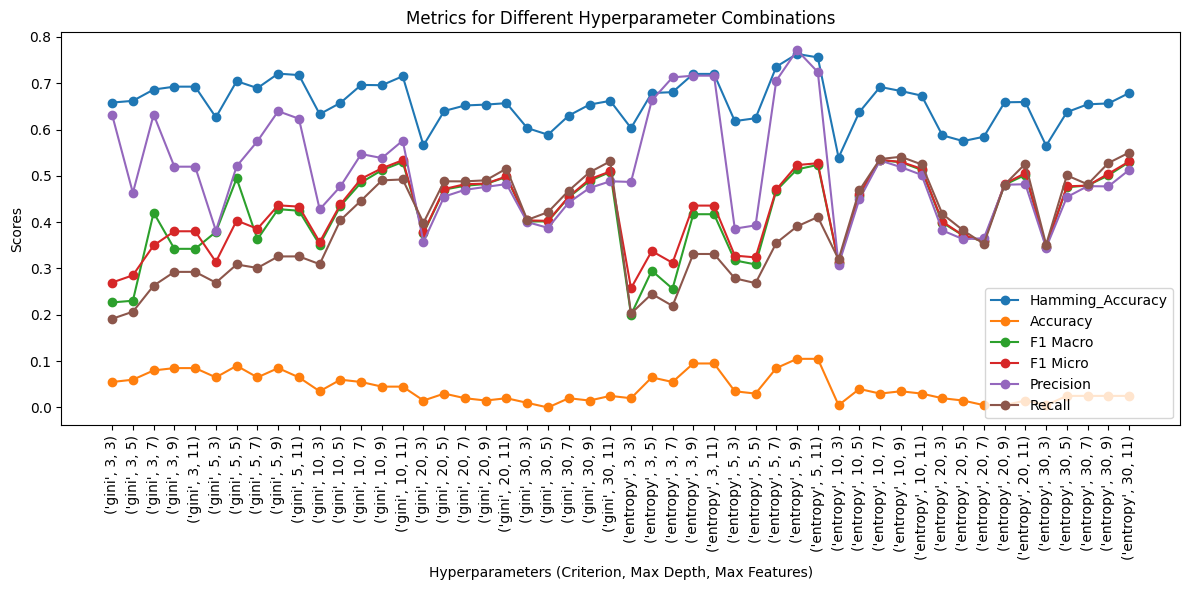

In [28]:
powerset_metrics = []
for criterion in ['gini', 'entropy']:
    for max_depth in [3,5,10,20,30]:
        for max_features in [3,5,7,9,11]:
            model = DT_Powerset(criterion=criterion, max_features=max_features, max_depth=max_depth)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            y_test_binary = []
            for i in y_test:
                y_test_binary.append(binary_representation[i])
            y_pred_binary = []
            for i in y_pred:
                y_pred_binary.append(binary_representation[i])
            loss = metrics.hamming_loss(y_test_binary, y_pred_binary)
            hamming_accuracy = (1 - loss)*100
            accuracy = metrics.accuracy_score(y_test_binary, y_pred_binary)
            recall = metrics.recall_score(y_test_binary, y_pred_binary, average='macro', zero_division=1)
            f1_macro = metrics.f1_score(y_test_binary, y_pred_binary, average='macro', zero_division=1)
            f1_micro = metrics.f1_score(y_test_binary, y_pred_binary, average='micro', zero_division=1)
            precision = metrics.precision_score(y_test_binary, y_pred_binary, average='macro', zero_division=1)
            confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
            powerset_metrics.append([criterion, max_depth, max_features, hamming_accuracy, accuracy, recall, f1_macro, f1_micro, precision, confusion_matrix])
# chatGPT Generated starts
parameters = [(result[0], result[1], result[2]) for result in powerset_metrics]
plt.figure(figsize=(12, 6))
plt.plot([result[3]/100 for result in powerset_metrics], marker='o', label='Hamming_Accuracy')
plt.plot([result[4] for result in powerset_metrics], marker='o', label='Accuracy')
plt.plot([result[6] for result in powerset_metrics], marker='o', label='F1 Macro')
plt.plot([result[7] for result in powerset_metrics], marker='o', label='F1 Micro')
plt.plot([result[8] for result in powerset_metrics], marker='o', label='Precision')
plt.plot([result[5] for result in powerset_metrics], marker='o', label='Recall')
plt.xticks(np.arange(len(powerset_metrics)), parameters, rotation='vertical')
plt.xlabel('Hyperparameters (Criterion, Max Depth, Max Features)')
plt.ylabel('Scores')
plt.title('Metrics for Different Hyperparameter Combinations')
plt.legend()
plt.tight_layout()
plt.show()
# chatGPT Generated ends

In [29]:
powerset_metrics

[['gini',
  3,
  3,
  65.8125,
  0.055,
  0.19142951141190576,
  0.22673508480182997,
  0.2696929238985314,
  0.6316303762027446,
  array([[4, 1, 0, ..., 0, 0, 0],
         [0, 2, 0, ..., 0, 0, 0],
         [0, 0, 4, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 1, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0]], dtype=int64)],
 ['gini',
  3,
  5,
  66.1875,
  0.06,
  0.20674397478053413,
  0.2304436555078489,
  0.285336856010568,
  0.4632426911390326,
  array([[4, 1, 0, ..., 0, 0, 0],
         [0, 4, 0, ..., 0, 0, 0],
         [0, 0, 4, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 1, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0]], dtype=int64)],
 ['gini',
  3,
  7,
  68.625,
  0.08,
  0.26302126661699354,
  0.4205248703511053,
  0.34974093264248707,
  0.6322953205306147,
  array([[3, 1, 0, ..., 0, 0, 0],
         [0, 4, 0, ..., 0, 0, 0],
         [0, 0, 5, ..., 0, 0, 0],
         ...,
         [0, 0, 1, ..., 0, 0, 0

In [30]:
data = pd.read_csv('./advertisement.csv')
print(data)

     age  gender        income    education  married  children           city   
0     45    Male  61271.953359       Master    False         3    Lake Sheila  \
1     24  Female  53229.101074  High School    False         1   Crystalburgh   
2     45  Female  30066.046684     Bachelor     True         3  Margaretburgh   
3     19    Male  48950.246384          PhD    False         0  Williamshaven   
4     29  Female  44792.627094       Master    False         0       New Paul   
..   ...     ...           ...          ...      ...       ...            ...   
995   61    Male  34246.773063       Master     True         3      Solisfurt   
996   56  Female  45494.225591     Bachelor    False         0    Dawsonmouth   
997   64  Female  68740.442006          PhD     True         0  Lake Garyport   
998   18  Female  44348.446680     Bachelor     True         0       Ericfurt   
999   61    Male  39160.083677       Master    False         0      Port Jose   

      occupation  purchase_

In [31]:
# chatGPT Generated starts
list_of_labels = [text.split() for text in data['labels']]
flat_list = [item for sublist in list_of_labels for item in sublist]
unique_elements = set(flat_list)
unique_elements = list(unique_elements)
# chatGPT Generated ends
print(unique_elements)

['sports', 'electronics', 'clothing', 'home', 'books', 'food', 'beauty', 'furniture']


In [32]:
# chatGPT Generated starts
data["labels"] = data["labels"].apply(lambda x: x.split())
# chatGPT Generated ends
encoded_labels = MultiLabelBinarizer(classes=unique_elements).fit_transform(data['labels'])
encoded_data = pd.DataFrame(encoded_labels, columns=unique_elements)
data = pd.concat([data, encoded_data], axis=1)

In [33]:
data

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels,sports,electronics,clothing,home,books,food,beauty,furniture
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,"[electronics, clothing, sports]",1,1,1,0,0,0,0,0
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,"[furniture, beauty]",0,0,0,0,0,0,1,1
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,"[clothing, electronics, food, sports]",1,1,1,0,0,1,0,0
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,[food],0,0,0,0,0,1,0,0
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,[home],0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,61,Male,34246.773063,Master,True,3,Solisfurt,HR,103.357441,bed,"[food, furniture]",0,0,0,0,0,1,0,1
996,56,Female,45494.225591,Bachelor,False,0,Dawsonmouth,Engineer,85.159023,biscuits,"[home, clothing, food]",0,0,1,1,0,1,0,0
997,64,Female,68740.442006,PhD,True,0,Lake Garyport,Salesman,101.434650,bat,"[sports, clothing]",1,0,1,0,0,0,0,0
998,18,Female,44348.446680,Bachelor,True,0,Ericfurt,Retired,97.649988,perfume,[beauty],0,0,0,0,0,0,1,0


In [34]:
y = data[unique_elements]
columns_to_keep = data.columns.difference(['labels']).difference(unique_elements)
columns_to_encode = ['gender', 'education', 'married' , 'city', 'occupation', 'most bought item']
for col in columns_to_encode:
    data[col] = LabelEncoder().fit_transform(data[col])
x = data[columns_to_keep]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test = y_test.values

In [35]:
class DT_multioutput:
    def __init__(self, max_depth=3, max_features=20, criterion="entropy", unique_labels=[]):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.unique_labels = unique_labels
        models = []
        for i in range(0, len(self.unique_labels)):
            models.append(DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, criterion=criterion))
        self.models = models

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        for i in range(0, len(self.unique_labels)):
            self.models[i].fit(x_train, y_train[self.unique_labels[i]])

    def predict(self, x_test):
        pred = []
        for i in range(0, len(self.unique_labels)):
            pred.append(self.models[i].predict(x_test))
        y_pred = []
        for i in range(len(pred[0])):
            new_array = [sub_array[i] for sub_array in pred]
            y_pred.append(new_array)
        return y_pred

    def print_kfold_metrics(self, x_train, y_train, k):
        n = len(x_train)
        base_partition_size = n // k
        remainder = n % k
        partitions_x = []
        partitions_y = []
        start_idx = 0
        for i in range(k):
            if i < remainder:
                partition_size = base_partition_size + 1
            else:
                partition_size = base_partition_size
            end_idx = start_idx + partition_size
            partition_x = x_train[start_idx:end_idx]
            partition_y = y_train[start_idx:end_idx]
            partitions_x.append(partition_x)
            partitions_y.append(partition_y)
            start_idx = end_idx
        kfold_metrics = []
        for i in range(0, len(partitions_x)):
            if i != 0:
                x_train_new = partitions_x[0]
                y_train_new = partitions_y[0]
                for j in range(1, len(partitions_x)):
                    if i != j:
                        x_train_new = x_train_new._append(partitions_x[j], ignore_index=True)
                        y_train_new = y_train_new._append(partitions_y[j], ignore_index=True)
            else:
                x_train_new = partitions_x[1]
                y_train_new = partitions_y[1]
                for j in range(2, len(partitions_x)):
                    x_train_new = x_train_new._append(partitions_x[j], ignore_index=True)
                    y_train_new = y_train_new._append(partitions_y[j], ignore_index=True)
            self.fit(x_train_new, y_train_new)
            y_pred = self.predict(partitions_x[i])
            y_test = partitions_y[i]
            y_pred = np.array(y_pred)
            loss = metrics.hamming_loss(y_test, y_pred)
            hamming_accuracy = (1 - loss)*100
            accuracy = metrics.accuracy_score(y_test, y_pred)
            recall = metrics.recall_score(y_test, y_pred, average='macro', zero_division=1)
            f1_macro = metrics.f1_score(y_test, y_pred, average='macro', zero_division=1)
            f1_micro = metrics.f1_score(y_test, y_pred, average='micro', zero_division=1)
            precision = metrics.precision_score(y_test, y_pred, average='macro', zero_division=1)
            # confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
            kfold_metrics.append([hamming_accuracy, accuracy, recall, f1_macro, f1_micro, precision])
        sum = 0
        for row in kfold_metrics:
            sum += row[0]
        hamming_accuracy = sum/k
        sum = 0
        for row in kfold_metrics:
            sum += row[1]
        accuracy = sum/k
        sum = 0
        for row in kfold_metrics:
            sum += row[2]
        recall = sum/k
        sum = 0
        for row in kfold_metrics:
            sum += row[3]
        f1_macro = sum/k
        sum = 0
        for row in kfold_metrics:
            sum += row[4]
        f1_micro = sum/k
        sum = 0
        for row in kfold_metrics:
            sum += row[5]
        precision = sum/k
        print("Hamming Accuracy: ", hamming_accuracy)
        print("Accuracy: ", accuracy)
        print("recall: ", recall)
        print("f1_macro: ", f1_macro)
        print("f1_micro: ", f1_micro)
        print("precision: ", precision)

In [36]:
model = DT_multioutput(unique_labels=unique_elements)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)

In [37]:
loss = metrics.hamming_loss(y_test, y_pred)
print("Hamming Loss:", loss)
print("Accuracy:", (1 - loss)*100)

Hamming Loss: 0.255625
Accuracy: 74.4375


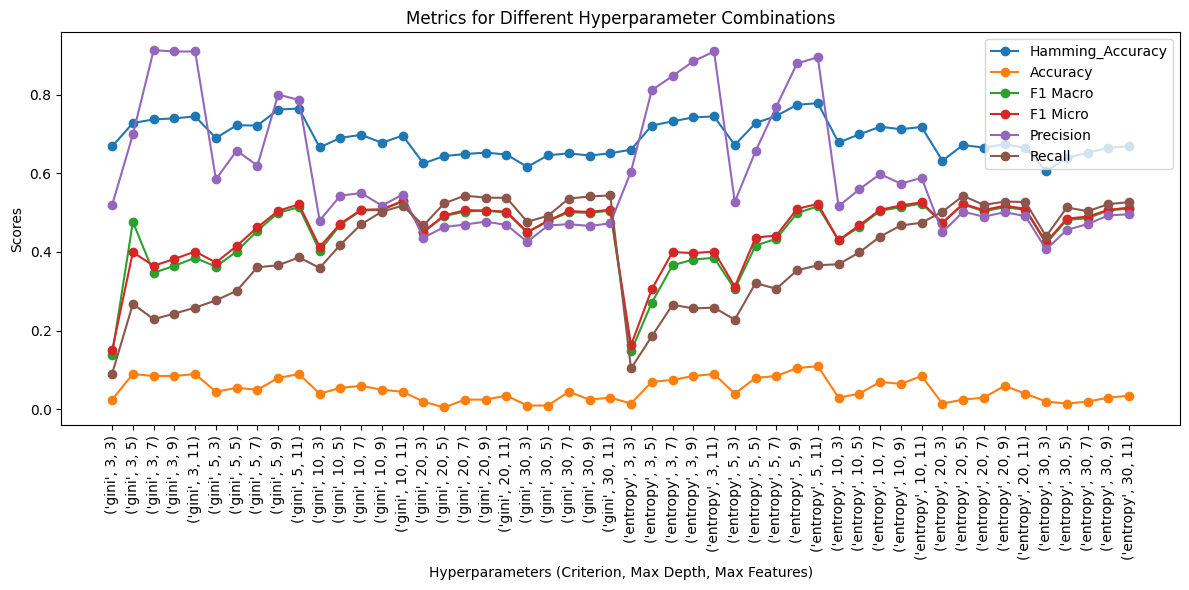

In [38]:
multioutput_metrics = []
for criterion in ['gini', 'entropy']:
    for max_depth in [3,5,10,20,30]:
        for max_features in [3,5,7,9,11]:
            model = DT_multioutput(criterion=criterion, max_features=max_features, max_depth=max_depth, unique_labels=unique_elements)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            y_pred = np.array(y_pred)
            loss = metrics.hamming_loss(y_test, y_pred)
            hamming_accuracy = (1 - loss)*100
            accuracy = metrics.accuracy_score(y_test, y_pred)
            recall = metrics.recall_score(y_test, y_pred, average='macro', zero_division=1)
            f1_macro = metrics.f1_score(y_test, y_pred, average='macro', zero_division=1)
            f1_micro = metrics.f1_score(y_test, y_pred, average='micro', zero_division=1)
            precision = metrics.precision_score(y_test, y_pred, average='macro', zero_division=1)
            # confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
            multioutput_metrics.append([criterion, max_depth, max_features, hamming_accuracy, accuracy, recall, f1_macro, f1_micro, precision])
# chatGPT Generated starts
parameters = [(result[0], result[1], result[2]) for result in multioutput_metrics]
plt.figure(figsize=(12, 6))
plt.plot([result[3]/100 for result in multioutput_metrics], marker='o', label='Hamming_Accuracy')
plt.plot([result[4] for result in multioutput_metrics], marker='o', label='Accuracy')
plt.plot([result[6] for result in multioutput_metrics], marker='o', label='F1 Macro')
plt.plot([result[7] for result in multioutput_metrics], marker='o', label='F1 Micro')
plt.plot([result[8] for result in multioutput_metrics], marker='o', label='Precision')
plt.plot([result[5] for result in multioutput_metrics], marker='o', label='Recall')
plt.xticks(np.arange(len(multioutput_metrics)), parameters, rotation='vertical')
plt.xlabel('Hyperparameters (Criterion, Max Depth, Max Features)')
plt.ylabel('Scores')
plt.title('Metrics for Different Hyperparameter Combinations')
plt.legend()
plt.tight_layout()
plt.show()
# chatGPT Generated ends

In [39]:
multioutput_metrics

[['gini',
  3,
  3,
  66.81250000000001,
  0.025,
  0.09055745644395188,
  0.13884861589414807,
  0.1504,
  0.5192035486443382],
 ['gini',
  3,
  5,
  72.75,
  0.09,
  0.268107232222808,
  0.47647907558755115,
  0.3994490358126721,
  0.6984519815226555],
 ['gini',
  3,
  7,
  73.6875,
  0.085,
  0.2292833724199837,
  0.3470730043655714,
  0.3650075414781298,
  0.9125915750915752],
 ['gini',
  3,
  9,
  73.9375,
  0.085,
  0.24352322328990916,
  0.36492861259298875,
  0.38222222222222224,
  0.9093023255813953],
 ['gini',
  3,
  11,
  74.4375,
  0.09,
  0.2586747384414243,
  0.38509667981987955,
  0.4011713030746705,
  0.9093023255813953],
 ['gini',
  5,
  3,
  68.9375,
  0.045,
  0.2770333163467142,
  0.36279931636675616,
  0.37326607818411095,
  0.5846331179060045],
 ['gini',
  5,
  5,
  72.1875,
  0.055,
  0.3013704786550861,
  0.4012192445254481,
  0.4152431011826544,
  0.6573399669436255],
 ['gini',
  5,
  7,
  72.125,
  0.05,
  0.36125007279545424,
  0.45413932286710956,
  0.462650

In [40]:
sorted_powerset_metrics = sorted(powerset_metrics, key=lambda x: x[6], reverse=True)
for row in sorted_powerset_metrics[:3]:
    print(row[:3])
powerset_best_config = sorted_powerset_metrics[0]

['entropy', 10, 7]
['entropy', 30, 11]
['gini', 10, 11]


In [41]:
sorted_multioutput_metrics = sorted(multioutput_metrics, key=lambda x: x[6], reverse=True)
for row in sorted_multioutput_metrics[:3]:
    print(row[:3])
multioutput_best_config = sorted_multioutput_metrics[0]

['gini', 10, 11]
['entropy', 10, 11]
['entropy', 20, 5]


In [42]:
data = pd.read_csv('./advertisement.csv')
list_of_labels = [text.split() for text in data['labels']]
flat_list = [item for sublist in list_of_labels for item in sublist]
unique_elements = set(flat_list)
power_set = list(powerset(unique_elements))
power_set.pop(0)
power_set = [tuple(sorted(t)) for t in power_set]
binary_representation = []
for tup in power_set:
    binary = [0] * len(unique_elements)
    for i, element in enumerate(unique_elements):
        if element in tup:
            binary[i] = 1
    binary_representation.append(binary)
data['labels'] = data['labels'].str.split()
data['labels'] = data['labels'].apply(lambda x: tuple(x))
data['labels'] = data['labels'].apply(lambda x: tuple(sorted(x)))
y = data['labels']
tuple_to_index = {tuple: index for index, tuple in enumerate(power_set)}
y = [tuple_to_index[tuple] for tuple in y]
columns_to_keep = data.columns.difference(['labels'])
columns_to_encode = ['gender', 'education', 'married' , 'city', 'occupation', 'most bought item']
for col in columns_to_encode:
    data[col] = LabelEncoder().fit_transform(data[col])
x = data[columns_to_keep]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
model = DT_Powerset(criterion=powerset_best_config[0], max_features=powerset_best_config[2], max_depth=powerset_best_config[1])
model.print_kfold_metrics(x_train, y_train, 5, binary_representation)

Hamming Accuracy:  60.40625
Accuracy:  0.026250000000000002
recall:  0.43005571187077285
f1_macro:  0.42799133530381345
f1_micro:  0.43045882246836714
precision:  0.43135029260581537


In [44]:
data = pd.read_csv('./advertisement.csv')
list_of_labels = [text.split() for text in data['labels']]
flat_list = [item for sublist in list_of_labels for item in sublist]
unique_elements = set(flat_list)
unique_elements = list(unique_elements)
data["labels"] = data["labels"].apply(lambda x: x.split())
encoded_labels = MultiLabelBinarizer(classes=unique_elements).fit_transform(data['labels'])
encoded_data = pd.DataFrame(encoded_labels, columns=unique_elements)
data = pd.concat([data, encoded_data], axis=1)
y = data[unique_elements]
columns_to_keep = data.columns.difference(['labels']).difference(unique_elements)
columns_to_encode = ['gender', 'education', 'married' , 'city', 'occupation', 'most bought item']
for col in columns_to_encode:
    data[col] = LabelEncoder().fit_transform(data[col])
x = data[columns_to_keep]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test = y_test.values

In [45]:
model = DT_multioutput(criterion=multioutput_best_config[0], max_features=multioutput_best_config[2], max_depth=multioutput_best_config[1], unique_labels=unique_elements)
model.print_kfold_metrics(x_train, y_train, 5)

Hamming Accuracy:  67.390625
Accuracy:  0.04875
recall:  0.47698842815032244
f1_macro:  0.5035196533694527
f1_micro:  0.5045858056834485
precision:  0.5461051786759074
